<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_Oximetry_Data_rep3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/Oximetry_Data.csv'

In [4]:
df = pd.read_csv(FILE_LOCATION)
df
#df.head()

,no,obs,rep,CO,PULSE,obs_new,CO_new,PULSE_new,CO_1,PULSE_1,CO_2,PULSE_2,CO_3,PULSE_3
0,1,1,1,0.5497,0.3889,1.0,0.5299,0.4104,0.5497,0.3889,0.5102,0.4102,0.5297,0.4320
1,2,1,2,0.5102,0.4102,2.0,0.3314,0.3208,0.3414,0.3274,0.3194,0.3076,0.3334,0.3274
2,3,1,3,0.5297,0.4320,3.0,0.6372,0.5694,0.6856,0.6585,0.6048,0.5248,0.6213,0.5248
3,4,2,1,0.3414,0.3274,4.0,0.2732,0.2500,0.2181,-0.1224,0.2842,0.3475,0.3174,0.5248
4,5,2,2,0.3194,0.3076,5.0,0.4837,0.4127,0.4959,0.5006,0.4475,0.4102,0.5078,0.3274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,60,2,0.7042,0.5248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,180,60,3,0.7432,0.6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,181,61,1,0.4982,0.4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,61,2,0.5174,0.3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table = df[['obs_new', 'CO_3', 'PULSE_3']]
table

,obs_new,CO_3,PULSE_3
0,1.0,0.5297,0.4320
1,2.0,0.3334,0.3274
2,3.0,0.6213,0.5248
3,4.0,0.3174,0.5248
4,5.0,0.5078,0.3274
...,...,...,...
178,NaN,NaN,NaN
179,NaN,NaN,NaN
180,NaN,NaN,NaN
181,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['obs_new', 'CO_3', 'PULSE_3'])
table1

,obs_new,CO_3,PULSE_3
0,1.0,0.5297,0.4320
1,2.0,0.3334,0.3274
2,3.0,0.6213,0.5248
3,4.0,0.3174,0.5248
4,5.0,0.5078,0.3274
5,6.0,0.5322,0.5497
6,7.0,0.8653,0.6585
7,8.0,0.7636,0.5248
8,9.0,0.4123,0.3889
9,10.0,0.0104,0.5497


In [7]:
x = table1[['PULSE_3']]
y = table1['CO_3']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ 'x1'    : table1['PULSE_3'],
                                'y'     : table1['CO_3'],
                                'y_hat' : df['Predicted']})
table_data_new['e'] = table_data_new['y'] - table_data_new['y_hat']
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
0,0.4320,0.5297,0.501174,0.028526
1,0.3274,0.3334,0.391525,-0.058125
2,0.5248,0.6213,0.598453,0.022847
3,0.5248,0.3174,0.598453,-0.281053
4,0.3274,0.5078,0.391525,0.116275
5,0.5497,0.5322,0.624555,-0.092355
6,0.6585,0.8653,0.738606,0.126694
7,0.5248,0.7636,0.598453,0.165147
8,0.3889,0.4123,0.455993,-0.043693
9,0.5497,0.0104,0.624555,-0.614155


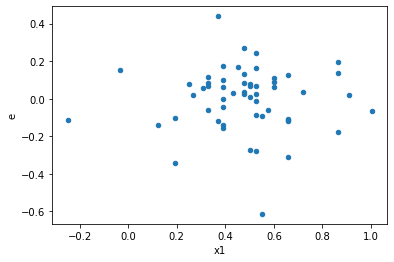

In [8]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [9]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = table_data_new[['y_hat']]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [10]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({'clusters' : y_kmeans})
kmean_clusters.head()

,clusters
0,1
1,1
2,0
3,0
4,1


In [11]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([table_data_new, kmean_clusters], axis=1)
data_clusters

,x1,y,y_hat,e,clusters
0,0.4320,0.5297,0.501174,0.028526,1.0
1,0.3274,0.3334,0.391525,-0.058125,1.0
2,0.5248,0.6213,0.598453,0.022847,0.0
3,0.5248,0.3174,0.598453,-0.281053,0.0
4,0.3274,0.5078,0.391525,0.116275,1.0
...,...,...,...,...,...
56,0.6585,0.6241,0.738606,-0.114506,NaN
57,0.9080,1.0210,1.000149,0.020851,NaN
58,1.0048,1.0376,1.101621,-0.064021,NaN
59,0.6021,0.7432,0.679484,0.063716,NaN


In [12]:
# Define in which columns to look for missing values.
data_clusters_new = data_clusters.dropna(subset=['x1', 'y', 'y_hat', 'e', 'clusters'])
data_clusters_new.head()

,x1,y,y_hat,e,clusters
0,0.4320,0.5297,0.501174,0.028526,1.0
1,0.3274,0.3334,0.391525,-0.058125,1.0
2,0.5248,0.6213,0.598453,0.022847,0.0
3,0.5248,0.3174,0.598453,-0.281053,0.0
4,0.3274,0.5078,0.391525,0.116275,1.0


In [13]:
# กลุ่มที่ 1
data_cluster0 = data_clusters_new[data_clusters_new.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
DF1

31.0

In [15]:
SSE1

1.11567200734721

In [16]:
# กลุ่มที่ 2
data_cluster1 = data_clusters_new[data_clusters_new.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

In [17]:
DF2

18.0

In [18]:
SSE2

0.4123092828096591

In [19]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

0.6364668151634588

In [20]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [21]:
two_tailed

1.6850649387128525

In [22]:
p_greater*2

0.3149350612871475

In [23]:
p_less

0.8425324693564262

###### The two-tailed p-value equals: 0.3149

###### p( x < 0.6365 ) = 0.1575
###### p( x > 0.6365 ) = 0.8425
###### p( x < 0.6365 ) + p( x >1.4976) = 0.3149
###### Since p-value > α, H0 is not rejected. (0.3149 > 0.05)

https://www.statskingdom.com/p_value.html

In [24]:
Significance = 0.05
if two_tailed < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
